In [3]:
from sklearn.neural_network import MLPRegressor
import numpy as np

class PolynomialMLP:
    def __init__(self, degree=3, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                 batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                 max_iter=200, shuffle=True, random_state=None, tol=1e-4, verbose=False, warm_start=False, 
                 momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                 beta_1=0.9, beta_2=0.999, epsilon=1e-8):
        self.degree = degree
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.solver = solver
        self.alpha = alpha
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.power_t = power_t
        self.max_iter = max_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.tol = tol
        self.verbose = verbose
        self.warm_start = warm_start
        self.momentum = momentum
        self.nesterovs_momentum = nesterovs_momentum
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        
        self.model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, 
                                  alpha=alpha, batch_size=batch_size, learning_rate=learning_rate, 
                                  learning_rate_init=learning_rate_init, power_t=power_t, max_iter=max_iter, 
                                  shuffle=shuffle, random_state=random_state, tol=tol, verbose=verbose, 
                                  warm_start=warm_start, momentum=momentum, nesterovs_momentum=nesterovs_momentum, 
                                  early_stopping=early_stopping, validation_fraction=validation_fraction, 
                                  beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        
    def fit(self, X, y):
        X_poly = np.column_stack([X**i for i in range(1, self.degree+1)])
        self.model.fit(X_poly, y)
        
    def predict(self, X):
        X_poly = np.column_stack([X**i for i in range(1, self.degree+1)])
        return self.model.predict(X_poly)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


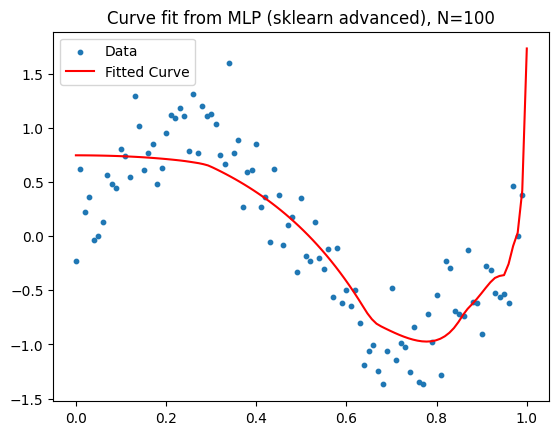

In [26]:
import matplotlib.pyplot as plt

N=100
# Generate some sample data
np.random.seed(seed = 20231)
x_train = np.arange(0,1,1/N)
t = [np.sin(2*np.pi*xn) + np.random.normal(0, 0.3) for xn in x_train]

# Create an instance of the PolynomialMLP class with degree=10
mlp = PolynomialMLP(degree=100)

# Fit the MLP to the data
mlp.fit(x_train, t)

# Generate predictions using the MLP
X_test = np.linspace(0, 1, 100)
y_pred = mlp.predict(X_test)

# Plot the data
plt.scatter(x_train, t, s=10, label='Data')
plt.plot(X_test, y_pred, color='red', label='Fitted Curve')
plt.legend()
plt.title("Curve fit from MLP (sklearn advanced), N=100")
plt.show()

In [32]:
x_test = np.random.uniform(0,1,100)

In [34]:
def MLP_run(N, deg):

    # Create an instance of the PolynomialMLP class with degree=10
    mlp = PolynomialMLP(degree=deg)

    # Fit the MLP to the data
    mlp.fit(x_train, t)

    # Generate predictions using the MLP

    y_pred = mlp.predict(x_test)
    return y_pred

In [18]:
def E_RMS(N: int, t, y):
    sq_error = [(yn - tn)**2 for yn, tn in zip(y, t)]
    return np.sqrt(np.mean(sq_error))

In [35]:
# Generate data

series_by_degree = [MLP_run(100, d) for d in range(1,101)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

In [36]:
y_test = [np.sin(2*np.pi*x) for x in x_test]

In [37]:
errors_by_degree = [E_RMS(100, series, y_test) for series in series_by_degree]

Text(0.5, 1.0, 'MSRE as a function of degree M for MLP (sklearn advanced), N=100')

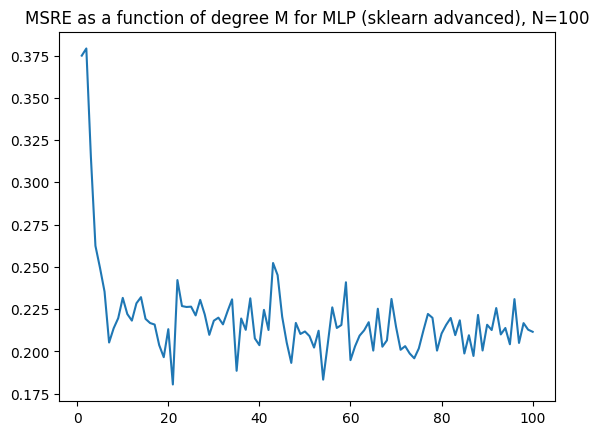

In [39]:
plt.plot(range(1,101), errors_by_degree)
plt.title("MSRE as a function of degree M for MLP (sklearn advanced), N=100")